# Exploratory Data Analysis - Cooksnap Feature - Cookpad

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
from operator import itemgetter 


### Read Data

In [2]:
df = pd.read_csv('data_analyst_interview_data.csv')

### Anatomy of Data

In [3]:
print("Columns:",list(df.columns))

Columns: ['id', 'user_id', 'recipe_id', 'event_time', 'event', 'view_duration', 'country', 'platform', 'ref', 'via']


In [4]:
df.head(2)

,id,user_id,recipe_id,event_time,event,view_duration,country,platform,ref,via
0,3171500938643,8290,59881,2020-07-01 15:31:11.096+00,view_duration,44.0,Narnia,web-mobile,NaN,NaN
1,3171658715039,6610,98603,2020-07-02 10:03:14.857+00,recipe.visit,NaN,Narnia,app-android,NaN,NaN


In [5]:
print("No of records         : {}".format(df.shape[0]))
print("No of dimensions      : {}".format(df.shape[1]))
print("No of unique users    : {}".format(df['user_id'].nunique()))
print("No of unique recipes  : {}".format(df['recipe_id'].nunique()))
print("Types of events       : ",df['event'].unique())
print("Types of ref          : ",df['ref'].unique())
print("Types of via          : ",df['via'].unique())

No of records         : 573854
No of dimensions      : 10
No of unique users    : 8980
No of unique recipes  : 107401
Types of events       :  ['view_duration' 'recipe.visit' 'recipe.publish' 'recipe.bookmark'
 'recipe.add_to_cookplan' 'recipe.share' 'recipe.react'
 'recipe.comments.visit' 'recipe.cooked_it' 'user.follow'
 'cookplan.comments.create' 'cooksnap.create' 'recipe.edit.open']
Types of ref          :  [nan 'RecipeView' 'Feed' 'cooked_recipes' 'feed' 'profile' 'recipe_page'
 'Search' 'unknown' 'uncooked_recipes' 'my_recipe_cookplan' 'inbox'
 'achievement' 'recipe_editor' 'my_recipe_uncooked' 'cooking_logs'
 'photo_comment_preview' 'recipe_ideas' 'UserProfile' 'search_result'
 'feed_from_your_network_single' 'my_recipe_cooked' 'feed_new_single'
 'cookplan_tray' 'following_feed' 'suggestions_feed' 'comments_preview'
 'recipe_tray_view' 'most_popular' 'search_result_integrated_uncooked'
 'comment_reply']
Types of via          :  [nan 'recipe_swipe' 'add_to_cookplan_button' 'quest

### Standardising the text in ref and via columns

In [6]:
df['ref'] = df['ref'].apply(lambda x: x.title() if type(x)==str else x)
df['via'] = df['via'].apply(lambda x: x.title() if type(x)==str else x)

In [7]:
print("View Duration Range:- Min: {} - Max: {}".format(min(df[df['event']=='view_duration']['view_duration']),max(df[df['event']=='view_duration']['view_duration'])))

View Duration Range:- Min: -1.0 - Max: 84169.0


### Time cannot be negative or zero, can drop those values less than or equal to zero

## View Time Distribution

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


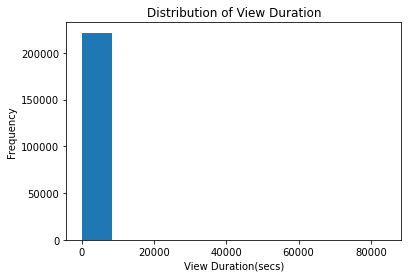

In [8]:
plt.title("Distribution of View Duration")
plt.hist(df[df['event']=='view_duration']['view_duration'])
plt.xlabel("View Duration(secs)")
plt.ylabel("Frequency")
plt.show()

### Zoom Time distribution

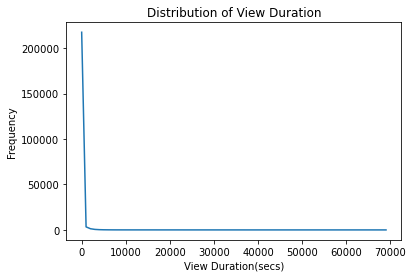

In [9]:
y=[]
for i in range(0,70000,1000):
    y.append(df[df['event']=='view_duration'].query('view_duration>'+str(i)).shape[0])

plt.title("Distribution of View Duration")
plt.plot(range(0,70000,1000),y)
plt.xlabel("View Duration(secs)")
plt.ylabel("Frequency")
plt.show()

### Zoom further

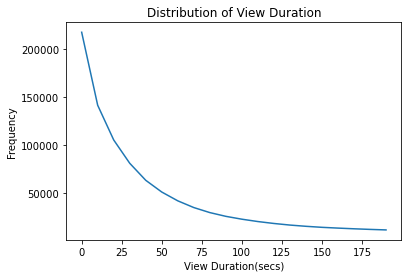

In [10]:
y=[]
for i in range(0,200,10):
    y.append(df[df['event']=='view_duration'].query('view_duration>'+str(i)).shape[0])

plt.title("Distribution of View Duration")
plt.plot(range(0,200,10),y)
plt.xlabel("View Duration(secs)")
plt.ylabel("Frequency")

plt.show()

In [11]:
print("Median value of view duration is {} seconds".format(np.median(df[df['event']=='view_duration'].query('view_duration>0')['view_duration'])))

Median value of view duration is 19.0 seconds


### Observation:

##### 1. We can observe that, any event with view duration higher than 5000 seconds can be treated as outlier as the frequency of observations around and after that point is absolute zeros

##### 2. Further zooming the view duration, we can observe, maximum portion of duration time is less than or equal to 120 sec 

##### 3. The view duration time is centered at 16 seconds

### 

## Platform

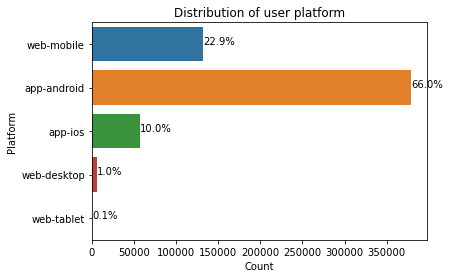

In [12]:
ax = sns.countplot(y="platform", data=df)
plt.title('Distribution of user platform')
plt.xlabel('Count')
plt.ylabel('Platform')

total = df.shape[0]
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### Time Distribution w.r.t Platform

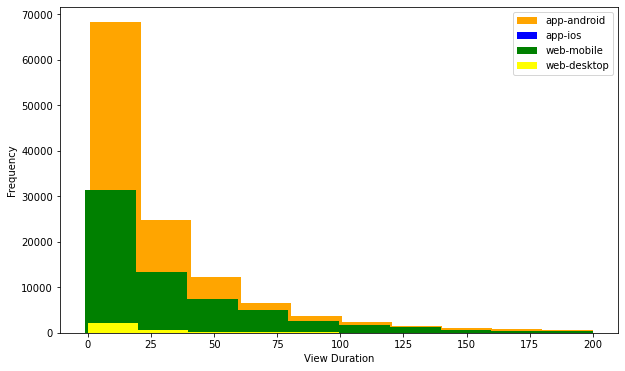

In [13]:
plt.figure(figsize=(10,6))
plt.hist(df[(df['event']=='view_duration') & (df['view_duration']<=200) & (df['platform']=='app-android')]['view_duration'],color='orange',label='app-android')
plt.hist(df[(df['event']=='view_duration') & (df['view_duration']<=200) & (df['platform']=='app-ios')]['view_duration'],color='blue',label='app-ios')
plt.hist(df[(df['event']=='view_duration') & (df['view_duration']<=200) & (df['platform']=='web-mobile')]['view_duration'],color='green',label='web-mobile')
plt.hist(df[(df['event']=='view_duration') & (df['view_duration']<=200) & (df['platform']=='web-desktop')]['view_duration'],color='yellow',label='web-desktop')
plt.legend(loc='upper right')
plt.xlabel("View Duration")
plt.ylabel("Frequency")
plt.show()

### Observation

##### Allmost all cookpad users are operate on mobile phones only. Very small amount of users are from other than mobile

### 

## View Duration of existing users

#### Understanding the view duration of users who have uploaded cooksnaps or cooked a recipe 

In [14]:
df = df[df['user_id'].isin(df[df['event'].isin(['cooksnap.create','recipe.cooked_it'])]['user_id'].unique())]
df.groupby(['user_id', 'recipe_id']).apply(lambda x: x.sort_values(['user_id', 'recipe_id','event_time'])).to_csv('Filtered.csv')
filtered = pd.read_csv("Filtered.csv")

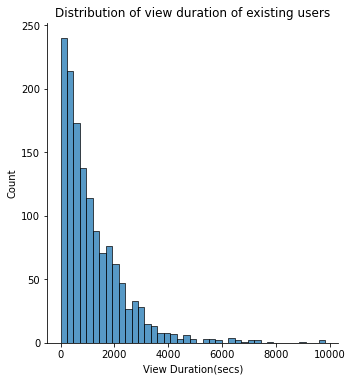

In [15]:
sns.displot(filtered['view_duration'].unique())
plt.title('Distribution of view duration of existing users')
plt.xlabel('View Duration(secs)')
plt.ylabel('Count')
plt.show()

### Observation

##### Compared to over view duration distribution, the above distribution a much meaningful upper bound at 10000 seconds

### 

### View Duration of existing users who have created cooksnaps atleast once

In [16]:
time,no_of_events,unique_events,visits = [],[],[],[]

def cooksnap_time(x):
    events = x['event'].unique()
    if 'cooksnap.create' in events:
        t = np.sum(x['view_duration'])
        if t >= 5:
            time.append(t)
    v = 0
    for each in events:
        if 'visit' in each:
            v+=1
    visits.append(v)
    no_of_events.append(len(x['event']))
    unique_events.extend(list(x['event'].unique()))

filtered.groupby(['user_id', 'recipe_id']).apply(lambda x: cooksnap_time(x))

""


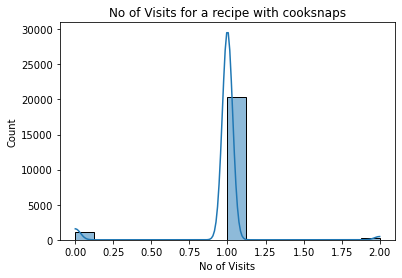

In [17]:
sns.histplot(visits,kde=True)
plt.title('No of Visits for a recipe with cooksnaps')
plt.xlabel('No of Visits')
plt.ylabel('Count')
plt.show()

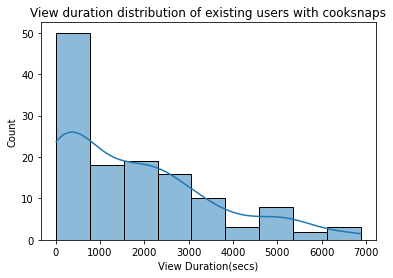

In [18]:
sns.histplot(time,kde=True)
plt.title('View duration distribution of existing users with cooksnaps')
plt.xlabel('View Duration(secs)')
plt.ylabel('Count')
plt.show()

In [19]:
print("Median View Duration is {} seconds".format(np.median(time)))
print("Minimum View Duration is {} seconds".format(np.min(time)))

Median View Duration is 1379.0 seconds
Minimum View Duration is 13.0 seconds


### Observation

##### 1. An average user who have uploaded cook snap viewed the recipe for around 1 hour. 
##### 2. Minimum time spent is 13 seconds

### No of events for a cooksnap 

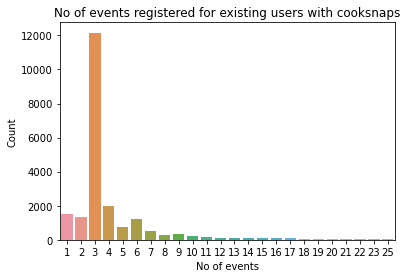

In [20]:
counter=collections.Counter(no_of_events)
counter = {k:v for k,v in counter.items() if v>30 }
keys = counter.keys()
values = counter.values()
plt.title('No of events registered for existing users with cooksnaps')
plt.xlabel('No of events')
plt.ylabel('Count')
sns.barplot(x=list(keys), y=list(values))
plt.show()

### Observation

##### We can observe a peak at the point 3, which means for any user to upload cooksnap they mostly have 2 or more events
##### (exclusing cooksnap event itself) on the recipe 
##### ** So a notification can be sent if a user perform 2 or more operation on a recipe **

# 

### Distribution of events w.r.t cooksnap 

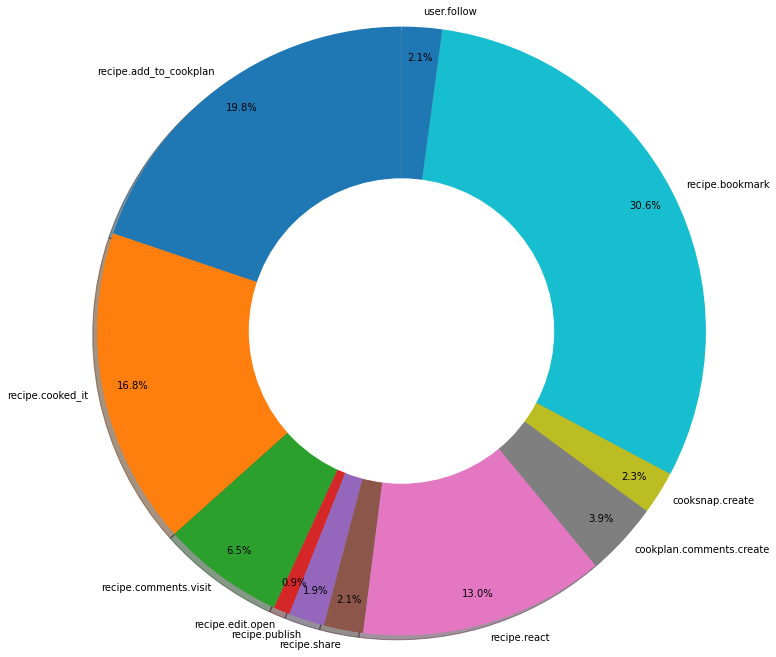

In [21]:
counter=collections.Counter(unique_events)

counter.pop('view_duration')
counter.pop('recipe.visit')
plt.figure(figsize=(25,10))
# plt.title('Distribution of events registered for existing users with cooksnaps')
plt.pie([float(v) for v in counter.values()], labels=[k for k in counter],autopct='%1.1f%%',
        shadow=True,  startangle=90, labeldistance=1.05,counterclock=True,pctdistance=0.9,radius=1.4)
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Observation

##### 1.We can see that user who bookmark a recipe are more probable to try the recipe and upload a cooksnap
##### 2.From the above chart we can derive that user who bookmark, add_to_plan, react, visits comments are trying out the recipe and uploading the cooksnap. So when we observe any of these actions from the user for a recipe, we can send a remainder to the user regarding the cooksnap

# 

### Distance Between CookSnap and first visit

In [22]:
cookedit_dist,cooksnap_dist,active_time,sizes = [],[],[],[]
def time_distance(x):
    sizes.append(x[x['event']=='recipe.visit'].shape[0])
    if x[x['event']=='recipe.visit'].shape[0]>0:
        first_visit = pd.to_datetime(min(x[x['event']=='recipe.visit']['event_time']), infer_datetime_format=True,utc=True)
        if x[x['event']=='recipe.cookedit'].shape[0]>0:
            cookedit_time = pd.to_datetime(min(x[x['event']=='recipe.cooked_it']['event_time']), infer_datetime_format=True,utc=True)
            cookedit_dist.append(cookedit_time-first_visit)

        if x[x['event']=='cooksnap.create'].shape[0]>0:
            cooksnap_time = pd.to_datetime(min(x[x['event']=='cooksnap.create']['event_time']), infer_datetime_format=True,utc=True)
            cooksnap_dist.append(cooksnap_time-first_visit)


filtered.groupby(['user_id', 'recipe_id']).apply(lambda x: time_distance(x))

""


In [23]:
time_dist_df = pd.DataFrame({'cooksnap_dist':cooksnap_dist})

time_dist_df['days'] = time_dist_df['cooksnap_dist'].apply(lambda x:x.days)
time_dist_df['hours'] = time_dist_df['cooksnap_dist'].apply(lambda x:x.seconds//3600)

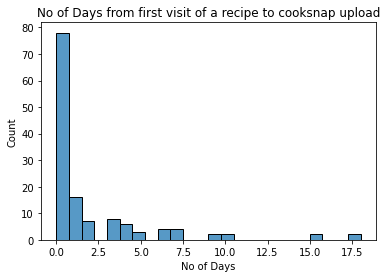

In [24]:
plt.title('No of Days from first visit of a recipe to cooksnap upload')
plt.xlabel('No of Days')
plt.ylabel('Count')
sns.histplot(time_dist_df['days'])
plt.show()

### Observation

##### High no of users are uploading a cooksnap on the same day they visited a recipe

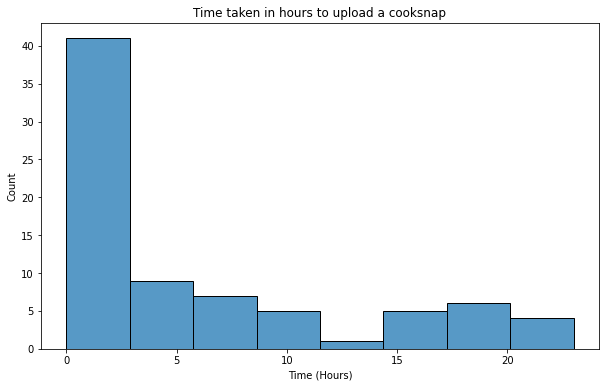

In [25]:
plt.figure(figsize=(10,6))
plt.title('Time taken in hours to upload a cooksnap')
plt.xlabel('Time (Hours)')
plt.ylabel('Count')
sns.histplot(time_dist_df[time_dist_df['days']==0]['hours'])
plt.show()

### Observation

##### We can observe the time taken to upload the cooksnap is 1 hour in majority of the cases. And if user did not upload the cooksnap with in 10 hours we can send another remainder around 14th hour from first recipe visit time

# Summary

##### 1. An average user who have uploaded cook snap viewed the recipe for around 1 hour
##### 2. Minimum time spent is 13 seconds
##### 3. Notification can be sent if a user perform 2 or more operation on a recipe
##### 4. We can see that user who bookmark a recipe are more probable to try the recipe and upload a cooksnap
##### 5. User who bookmark, add_to_plan, react, visits comments are trying out the recipe and uploading the cooksnap. So when we observe any of these actions from the user for a recipe, we can send a remainder to the user regarding the cooksnap when he visit the recipe then after
##### 6. Time taken to upload the cooksnap is 1 hour in majority of the cases. And if user did not upload the cooksnap with in 10 hours we can send another remainder around 14th hour from first recipe visit time

# 

### New user EDA

Considering a user a new user if he does not have any cooksnap uploads and never published a recipe

In [26]:
new_users = df[~df['user_id'].isin(df[df['event'].isin(['cooksnap.create','recipe.publish'])]['user_id'].unique())]

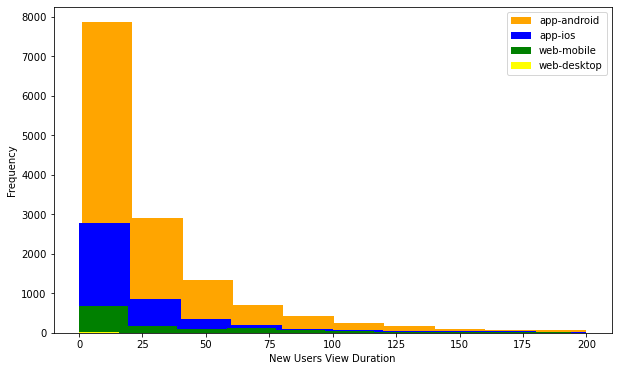

In [27]:
plt.figure(figsize=(10,6))
plt.hist(new_users[(new_users['event']=='view_duration') & (new_users['view_duration']<=200) & (new_users['platform']=='app-android')]['view_duration'],color='orange',label='app-android')
plt.hist(new_users[(new_users['event']=='view_duration') & (new_users['view_duration']<=200) & (new_users['platform']=='app-ios')]['view_duration'],color='blue',label='app-ios')
plt.hist(new_users[(new_users['event']=='view_duration') & (new_users['view_duration']<=200) & (new_users['platform']=='web-mobile')]['view_duration'],color='green',label='web-mobile')
plt.hist(new_users[(new_users['event']=='view_duration') & (new_users['view_duration']<=200) & (new_users['platform']=='web-desktop')]['view_duration'],color='yellow',label='web-desktop')
plt.legend(loc='upper right')
plt.xlabel("New Users View Duration")
plt.ylabel("Frequency")
plt.show()

### Observation

##### View duration of new users is very similar to the existing user behaviour 

In [28]:
visits = []
no_of_events = []
unique_events = []

def visits_events(x):
    events = x['event'].unique()
    v = 0
    for each in events:
        if 'visit' in each:
            v+=1
    visits.append(v)
    no_of_events.append(len(x['event']))
    unique_events.extend(list(x['event'].unique()))

new_users.groupby(['user_id', 'recipe_id']).apply(lambda x: visits_events(x))


""


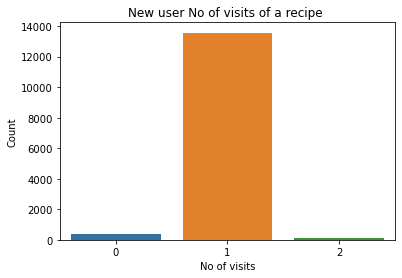

In [29]:
counter=collections.Counter(visits)
counter = {k:v for k,v in counter.items()}
keys = counter.keys()
values = counter.values()
plt.title('New user No of visits of a recipe ')
plt.xlabel('No of visits')
plt.ylabel('Count')
sns.barplot(x=list(keys), y=list(values))
plt.show()

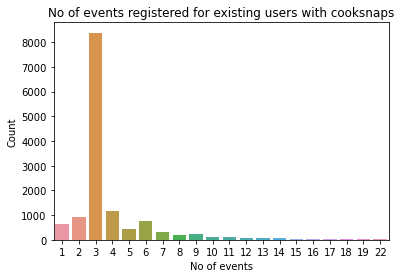

In [30]:
counter=collections.Counter(no_of_events)
counter = {k:v for k,v in counter.items() if v>30 }
keys = counter.keys()
values = counter.values()
plt.title('No of events registered for existing users with cooksnaps')
plt.xlabel('No of events')
plt.ylabel('Count')
sns.barplot(x=list(keys), y=list(values))
plt.show()

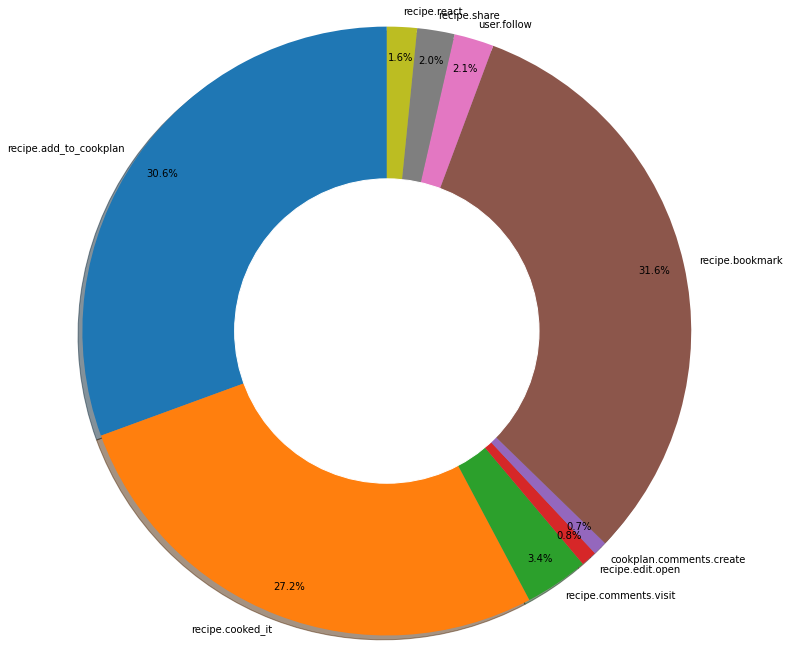

In [31]:
counter=collections.Counter(unique_events)

counter.pop('view_duration')
counter.pop('recipe.visit')

plt.figure(figsize=(20,10))
explode = [1]*len(list(counter.keys()))
plt.pie([float(v) for v in counter.values()], labels=[k for k in counter],autopct='%1.1f%%',
        shadow=True, startangle=90, labeldistance=1.05,counterclock=True,pctdistance=0.9,radius=1.4)
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Observation

##### There is no differnce between No of events and no of visits between existing users and new users. We can adopt the same analysis of existing users to new users

## Summary

#### No change in the user behaviour is observed between existing and new users. We can apply same rules derived from existing users to new users

# 

## User Engagement Traffic

We have two dimensions ref and via in the given data which refers to the screen and button to perform an action. Lets see how this help us understand the cooksnap upload pattern

### Ref - screen where an action was performed

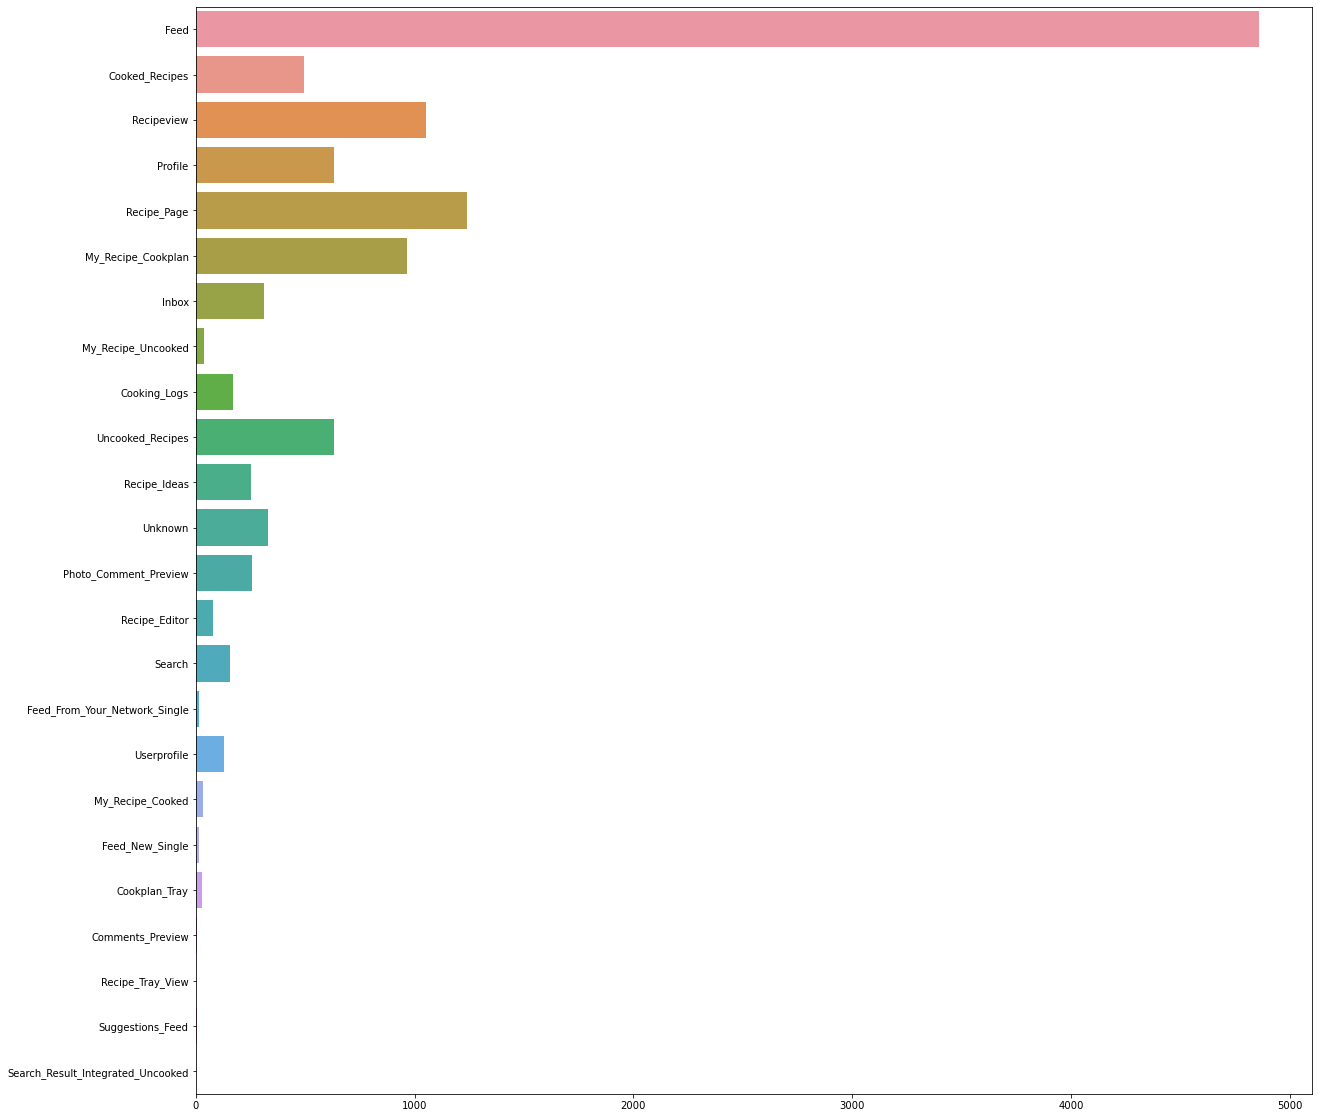

In [32]:
counter=collections.Counter(df[~df['ref'].isnull()]['ref'])

plt.figure(figsize=(20,20))
sns.barplot(x=list(counter.values()), y=list(counter.keys()))
plt.show()

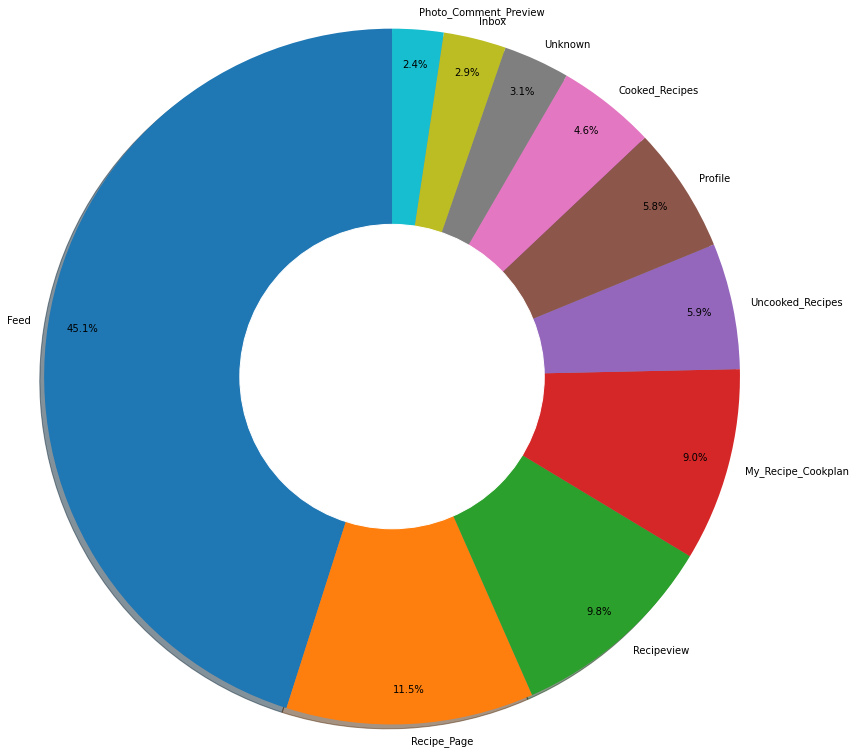

In [33]:
top_refs = dict(sorted(counter.items(), key = itemgetter(1), reverse = True)[:10]) 

plt.figure(figsize=(20,10))
explode = [1]*len(list(counter.keys()))
plt.pie([float(v) for v in top_refs.values()], labels=[k for k in top_refs],autopct='%1.1f%%',
        shadow=True, startangle=90, labeldistance=1.05,counterclock=True,pctdistance=0.9,radius=1.6)
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### via - a button an action was performed

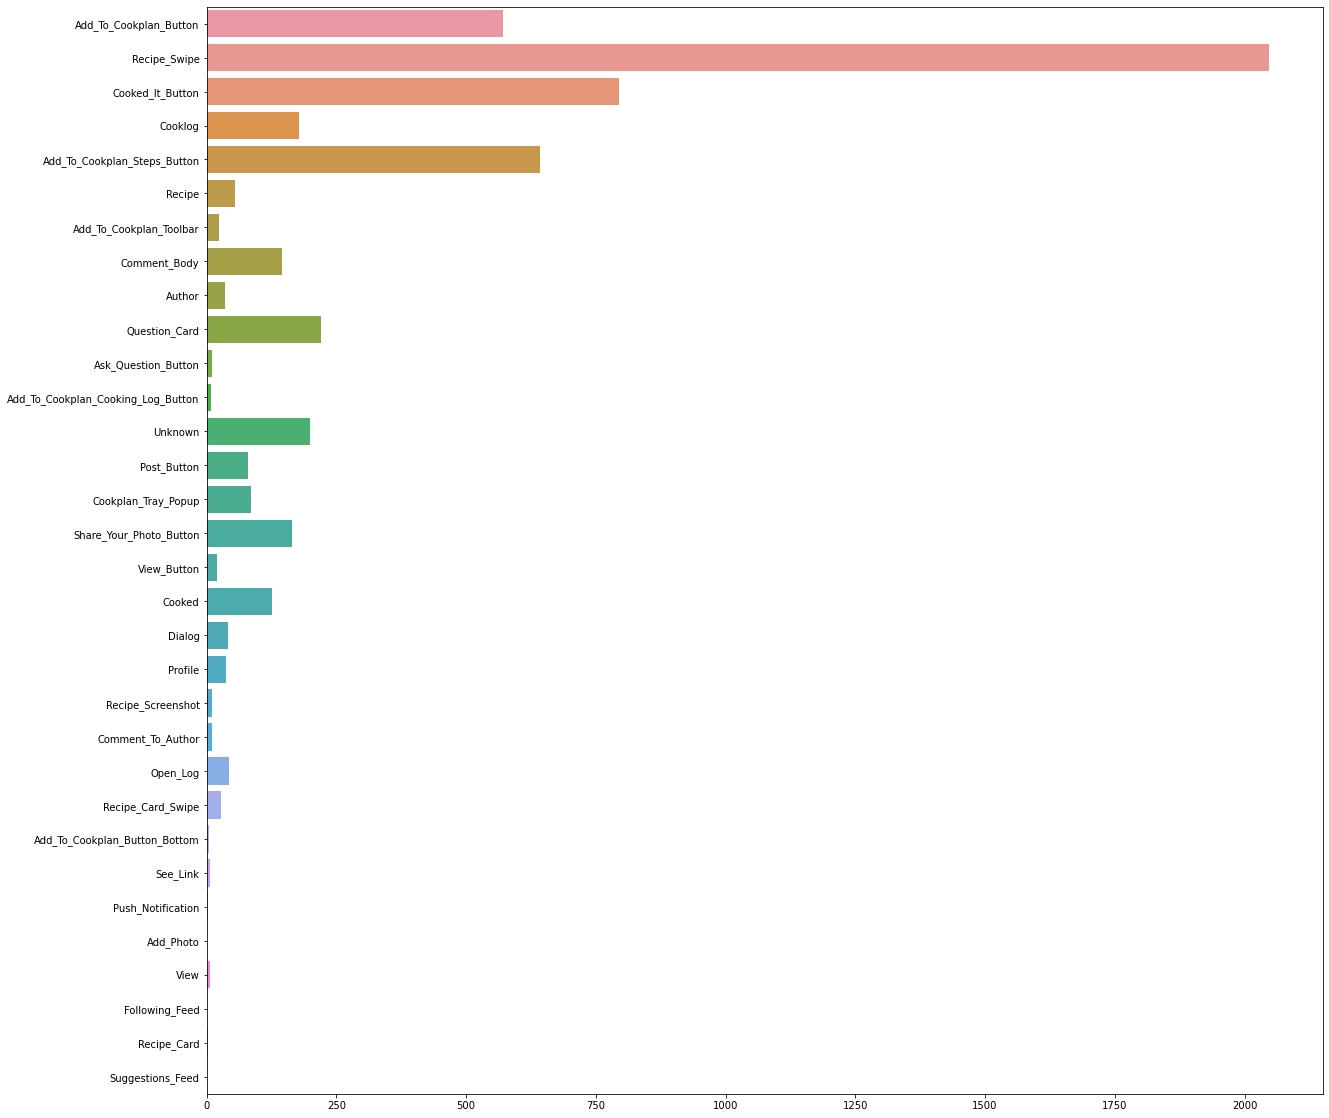

In [34]:
counter=collections.Counter(df[~df['via'].isnull()]['via'])

plt.figure(figsize=(20,20))
sns.barplot(x=list(counter.values()), y=list(counter.keys()))
plt.show()

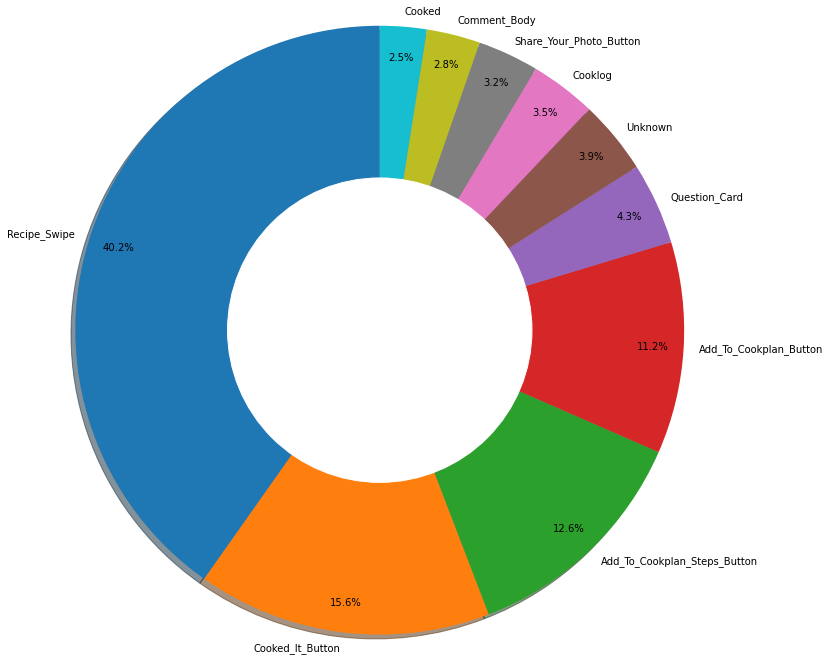

In [35]:
top_via = dict(sorted(counter.items(), key = itemgetter(1), reverse = True)[:10]) 

plt.figure(figsize=(20,10))
explode = [1]*len(list(counter.keys()))
plt.pie([float(v) for v in top_via.values()], labels=[k for k in top_via],autopct='%1.1f%%',
        shadow=True, startangle=90, labeldistance=1.05,counterclock=True,pctdistance=0.9,radius=1.4)
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Since both ref and via refers to the user engagement. I am merging both.

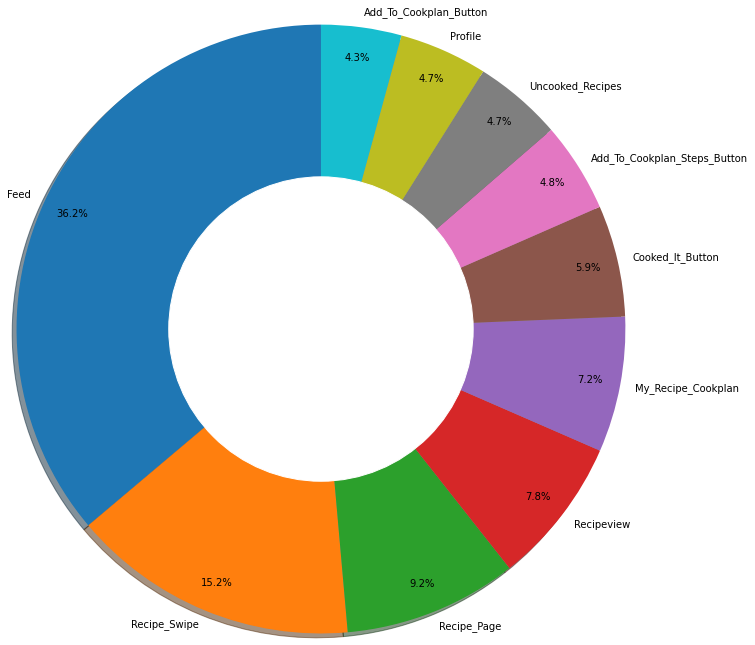

In [36]:
top_keys = list(top_refs.keys())
top_keys.extend(list(top_via.keys()))
top_interations = {k: top_refs.get(k) if type(top_refs.get(k))==int else 0+ top_via.get(k) if type(top_via.get(k))==int else 0 for k in top_keys}
top_interations = dict(sorted(top_interations.items(), key = itemgetter(1), reverse = True)[:10]) 

plt.figure(figsize=(20,10))
plt.pie([float(v) for v in top_interations.values()], labels=[k for k in top_interations],autopct='%1.1f%%',
        shadow=True, startangle=90, labeldistance=1.05,counterclock=True,pctdistance=0.9,radius=1.4)

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

### Observation

##### Majority of the user enagagment is happen through only a feed foolwed by recipe view, recipe_swipe so on. The top 3 itself cover 70% of total user engagement

# 

# Effective Interactions

In [37]:
top_inter_df = df[(df['ref'].isin(list(top_interations.keys()))) | (df['via'].isin(list(top_interations.keys())))]
top_inter_df['button'] = top_inter_df.apply(lambda x : x['ref'] if type(x['ref'])==str else x['via'],axis=1)
grouped_data = pd.crosstab(top_inter_df['button'],top_inter_df['event'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


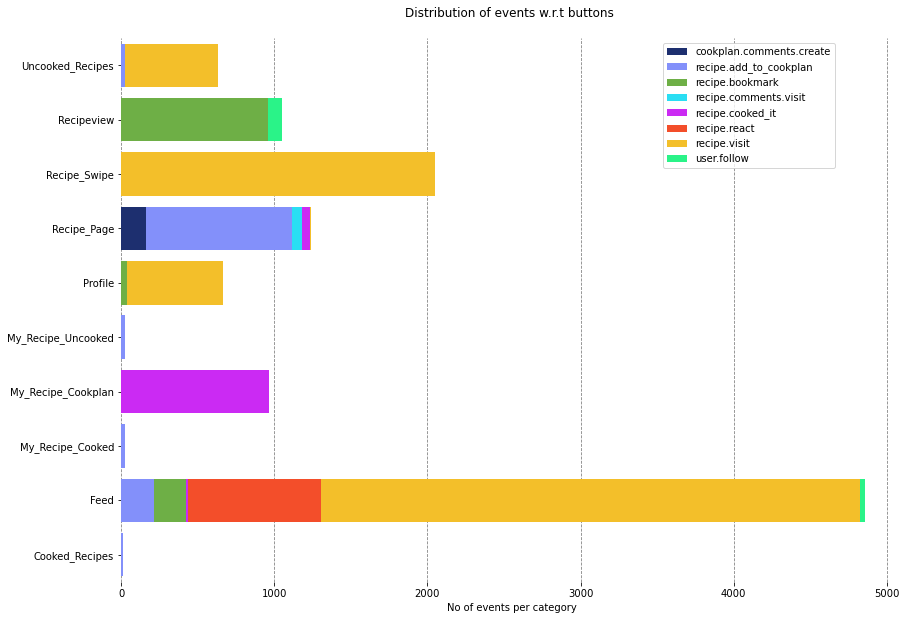

In [38]:
fields = grouped_data.columns
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#2ADEF3', '#CB2AF3', '#F34E2A', '#F3BF2A', '#2AF388']
labels = grouped_data.columns
# figure and axis
fig, ax = plt.subplots(1, figsize=(14, 10))
# plot bars
left = len(grouped_data) * [0]
for idx, name in enumerate(fields):
    plt.barh(grouped_data.index, grouped_data[name], left = left, color=colors[idx])
    left = left + grouped_data[name]
# title, legend, labels
plt.title('Distribution of events w.r.t buttons \n', loc='center')
plt.legend(labels, ncol=1, bbox_to_anchor=([0.55, 1, 0.37, 0]),frameon=True)
plt.xlabel('No of events per category')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

### Observation

##### Recipe which are enagaged user with Recipe Cookplan and Recipe Page and Feed has high conversion rate

In [39]:
time = []
no_of_events = []
unique_events = []
visits = []
cookedit_dist = []

def receipe_cooked_it_metrics(x):
    events = x['event'].unique()
    if 'cooksnap.create' in events:
        t = np.sum(x['view_duration'])
        if t >= 5:
            time.append(t)
    v = 0
    for each in events:
        if 'visit' in each:
            v+=1
    visits.append(v)
    no_of_events.append(len(x['event']))
    unique_events.extend(list(x['event'].unique()))
    
    if x[x['event'].isin(['recipe.bookmark', 'recipe.add_to_cookplan'])].shape[0]>0:
        first_visit = pd.to_datetime(min(x['event_time']), infer_datetime_format=True,utc=True)
        if x[x['event']=='recipe.cooked_it'].shape[0]>0:
            cookedit_time = pd.to_datetime(min(x[x['event']=='recipe.cooked_it']['event_time']), infer_datetime_format=True,utc=True)
            cookedit_dist.append(cookedit_time-first_visit)


top_inter_df.groupby(['user_id', 'recipe_id']).apply(lambda x: receipe_cooked_it_metrics(x))


""


In [40]:
cookedit_dist_df = pd.DataFrame({'cooked_it_time':cookedit_dist})

cookedit_dist_df['days'] = cookedit_dist_df['cooked_it_time'].apply(lambda x : x.days)
cookedit_dist_df['hours'] = cookedit_dist_df['cooked_it_time'].apply(lambda x : x.seconds//3600)

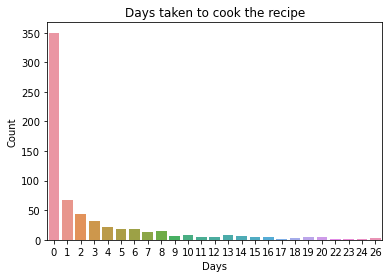

In [41]:
counter=collections.Counter(cookedit_dist_df['days'])
keys = counter.keys()
values = counter.values()
sns.barplot(x=list(keys), y=list(values))
plt.title('Days taken to cook the recipe')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

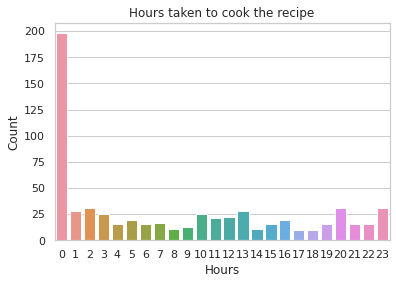

In [42]:
counter=collections.Counter(cookedit_dist_df['hours'])
keys = counter.keys()
values = counter.values()
sns.set_theme(style="whitegrid")
sns.barplot(x=list(keys), y=list(values))
plt.title('Hours taken to cook the recipe')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

### Observation

#### Similar pattern has been observed. User cook the recipe on the same within 1 hour in majority of cases.

# 

# Summary

##### 1. An average user who have uploaded cook snap viewed the recipe for around 1 hour
##### 2. Minimum time spent is 13 seconds
##### 3. Notification can be sent if a user perform 2 or more operation on a recipe
##### 4. We can see that user who bookmark a recipe are more probable to try the recipe and upload a cooksnap
##### 5. User who bookmark, add_to_plan, react, visits comments are trying out the recipe and uploading the cooksnap. So when we observe any of these actions from the user for a recipe, we can send a remainder to the user regarding the cooksnap when he visit the recipe then after
##### 6. Time taken to upload the cooksnap is 1 hour in majority of the cases. And if user did not upload the cooksnap with in 10 hours we can send another remainder around 14th hour from first recipe visit time

# 

##### Addition to the above summarised points. It is clearly seen that
##### 1. New user enagament with the pattern is very similar to the existing user
##### 2. Existing users who have tried a recipe and not uploaded any cooksnap also have very similar behaviour to the users with cooksnaps uploads
##### 3. From the analysis, we can apply the same rules derived

# THANKYOU